In [ ]:
#Coded by Sneha Kumari

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2

In [2]:
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os
#from tqdm import tqdm
img_data=[]

In [3]:

from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger images. 
img_data=[]

In [4]:
img=cv2.imread('acoustic guitar_016.jpg', 1)   #Change 1 to 0 for Grey scale images
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

In [5]:
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [6]:
def gaussiannoise(img):
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    img = cv2.add(img,gauss)
    return img

In [7]:
img_data2=[]  #Second image to be provided as ground truth. 
img2=cv2.imread('acoustic guitar_016.jpg', 1)   #Change 1 to 0 for Grey scale images
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2 = gaussiannoise(img2)
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))
img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

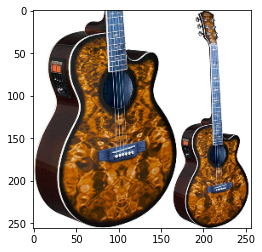

In [8]:
import matplotlib.pyplot as plt
#filepath = df_merge['path_img'][0]
#img = cv2.imread(filepath,1)
plt.imshow(img)
plt.show()

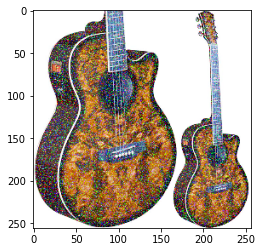

In [9]:
# img = gaussiannoise(img)
plt.imshow(img2)
plt.show()

In [10]:
# img_data3=[]  #Second image to be provided as ground truth. 
# img3=cv2.imread('frame_0002.jpg', 1)   #Change 1 to 0 for Grey scale images
# #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
# img3 = gaussiannoise(img3)
# img3=cv2.resize(img3,(SIZE, SIZE))
# img_data3.append(img_to_array(img3))
# img_array3 = np.reshape(img_data3, (len(img_data3), SIZE, SIZE, 3))
# img_array3 = img_array3.astype('float32') / 255.
# # print("Output")
# # pred = model.predict(img_array3)   #Predict model on the same input array.

# # #In reality, train on 1000s of input images and predict on images that the training 
# # #algorithm never saw. 

# # imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 256, 256, 64)      6976      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 8)       4616      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 8)       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


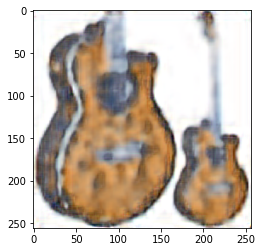

In [14]:

#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(64, (6, 6), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

model.fit(img_array, img_array2,
        epochs=1000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch


print("Output")
pred = model.predict(img_array2)   #Predict model on the same input array.

#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw. 

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")


#img2 = Image.fromarray(pred[0], 'RGB')
#img2.save("processed_img.jpg")